In [1]:
### Load in the libraries and the data
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
# The following line is useful before each plot to increase the default size that it is rendered at:
# plt.figure(figsize=(20,10))

data = pd.read_csv('./T1_data/2022-task1_data.csv')
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
1,2,0.000050,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0
2,3,0.000240,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5..."
3,4,0.186710,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...
4,5,1.119689,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
...,...,...,...,...,...,...,...
34465,34466,819.314740,PcsCompu_03:cb:a5,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.12
34466,34467,820.066244,PcsCompu_60:73:28,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.11
34467,34468,820.146617,PcsCompu_90:18:5a,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.14
34468,34469,820.224071,PcsCompu_c8:46:cd,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.13


### Total Number of Packets Task 1: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)

*Hint: The Time column could be grouped by minute by changing the precision of how time is measured.*

Conclusion----->: The number of packets are increasing as time goes up, there is a spark beacuase the total packets numbers reach to the top of the datesets and the packets was SMB so the user was using SMB share alot during that time, maybe the user was writing,reading or uploading files on the system


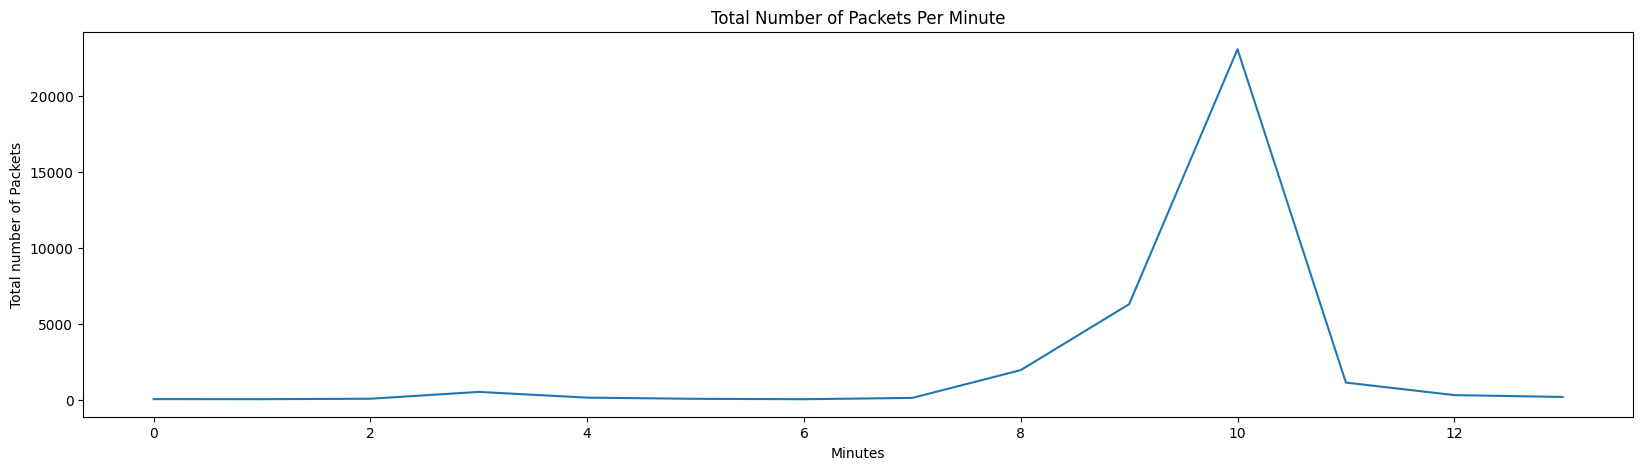

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    



data['Seconds'] = data['Time'].astype(int)
data['Minutes'] = data['Seconds'].astype(int) / 60
data['Minutes'] = data['Minutes'].astype(int)
# df = pd.read_csv("./T1_data/2022-task1_data.csv", usecols = ['Time'])
# df2 = pd.read_csv("./T1_data/2022-task1_data.csv", usecols = ['No.'])
# dd  = pd.to_datetime(df['Time'], unit='m')
# print(data['Minutes'])
plt.figure(figsize=(20,5))
# plt.plot(data['Minutes'])
plt.plot(data['Minutes'].value_counts().sort_index())
plt.title("Total Number of Packets Per Minute")
plt.xlabel('Minutes')
plt.ylabel('Total number of Packets')
print('Conclusion----->: The number of packets are increasing as time goes up, there is a spark beacuase the total packets numbers reach to the top of the datesets and the packets was SMB so the user was using SMB share alot during that time, maybe the user was writing,reading or uploading files on the system')



### Task 2: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)

*Hint: Group you data by "Time" and then you can take the sum of the Length column.*

Conclusion----->: The number of packets are increasing as time goes up, there is a spark beacuase the total packets length reach to the top of the datesets and the packets was SMB so the user was using SMB share alot during that time, maybe the user was writing,reading or uploading files on the system


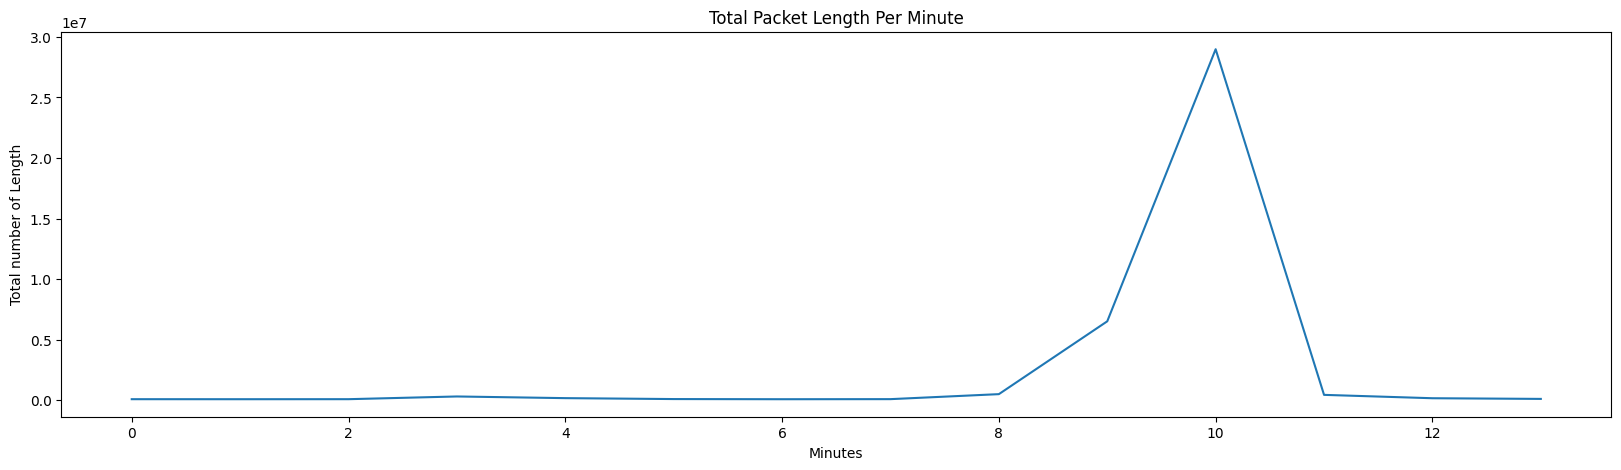

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
  

new_data = data.groupby(['Minutes'],sort=False).sum()

plt.figure(figsize=(20,5))
plt.plot(new_data["Length"])
plt.title("Total Packet Length Per Minute")
plt.xlabel('Minutes')
plt.ylabel('Total number of Length')
print('Conclusion----->: The number of packets are increasing as time goes up, there is a spark beacuase the total packets length reach to the top of the datesets and the packets was SMB so the user was using SMB share alot during that time, maybe the user was writing,reading or uploading files on the system')



### Task 3: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

Conclusion----->: SMB has the most count over other Protocols becasue it was most frequent used protocl from the WireShark traffic, and the user was constantly using SMB share such as transfer, writing files on the sysyem


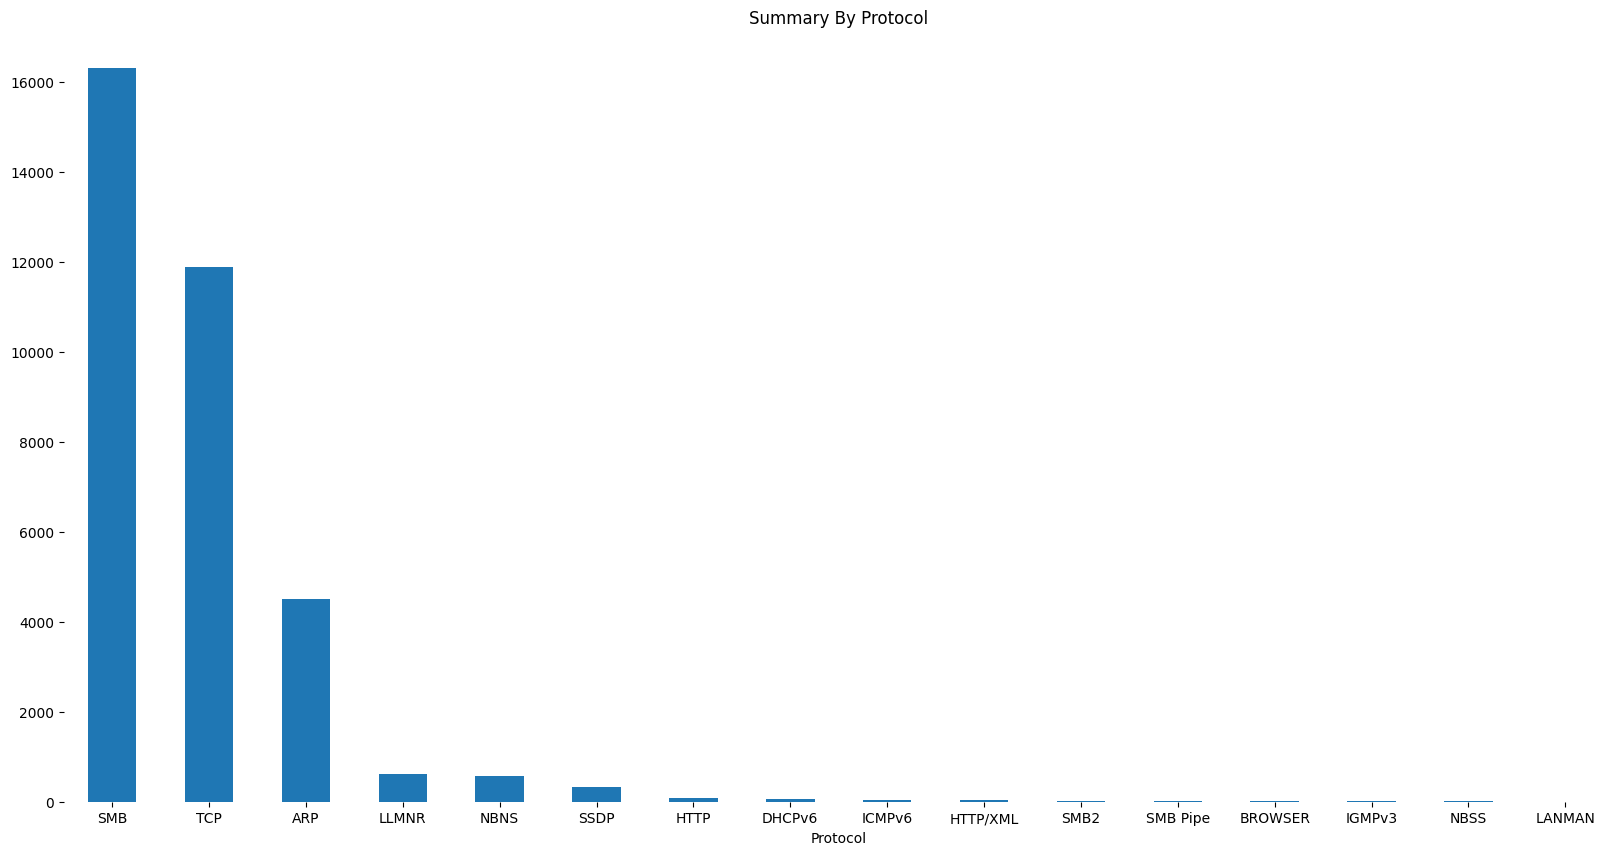

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

print('Conclusion----->: SMB has the most count over other Protocols becasue it was most frequent used protocl from the WireShark traffic, and the user was constantly using SMB share such as transfer, writing files on the sysyem')

country_ct = data.value_counts(data['Protocol'])

# plot the data
plt.axes(frameon=0) # reduce chart junk
country_ct[:20].plot(kind='bar', 
   rot=0, title="Summary By Protocol", figsize=(20,10)).grid(False)
plt.show()


### Task 4: Display a Scatter Chart that shows the association between Source and Destination data. (2)

*Hint: Matplotlib has a scatterplot function that takes ***x*** and ***y*** as inputs*

Conclusion----->: SMB has the most count over other Protocols


<Figure size 2000x500 with 0 Axes>

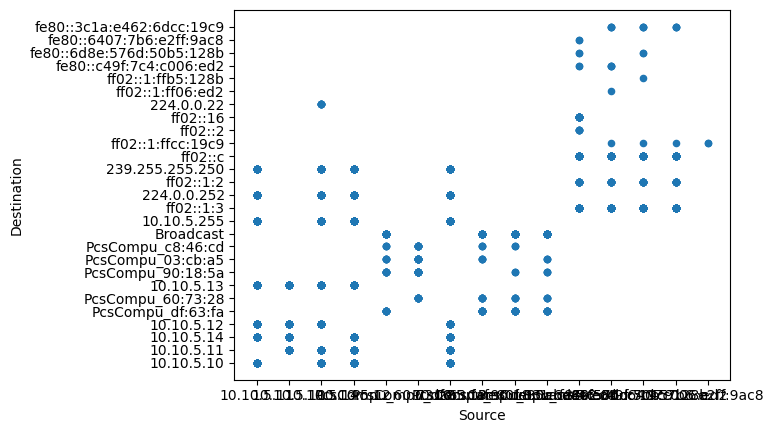

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df= pd.read_csv("./T1_data/2022-task1_data.csv", usecols = ['Source', 'Destination'])
plt.figure(figsize=(20,5))

df.plot.scatter(x = 'Source', y = 'Destination')

print('Conclusion----->: SMB has the most count over other Protocols')


### Task 5: Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)

*Hint: Retrieve all rows where the Source string starts with 10.*

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns


print('Conclusion----->: It shows all the source IPs starting with 10')

df = data[data['Source'].str.contains('10')]
df


Conclusion----->: It shows all the source IPs starting with 10


,No.,Time,Source,Destination,Protocol,Length,Info,Seconds,Minutes
0,1,0.000000,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0,0
1,2,0.000050,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0,0,0
2,3,0.000240,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5...",0,0
3,4,0.186710,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...,0,0
4,5,1.119689,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",1,0
...,...,...,...,...,...,...,...,...,...
34455,34456,818.104499,10.10.5.13,10.10.5.10,TCP,8214,"49196 > 1293 [PSH, ACK] Seq=298831 Ack=811 W...",818,13
34456,34457,818.104531,10.10.5.10,10.10.5.13,TCP,54,1293 > 49196 [ACK] Seq=811 Ack=306991 Win=43...,818,13
34457,34458,818.104875,10.10.5.10,10.10.5.13,TCP,69,"1293 > 49196 [PSH, ACK] Seq=811 Ack=306991 W...",818,13
34460,34461,818.294131,10.10.5.13,10.10.5.10,TCP,60,49196 > 1293 [ACK] Seq=306991 Ack=826 Win=25...,818,13


### (Advanced) Task 6: Display a Node Link Diagram for this new DataFrame. (3)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

Conclusion----->: 224.0.0.22 has longest distance apart from others.


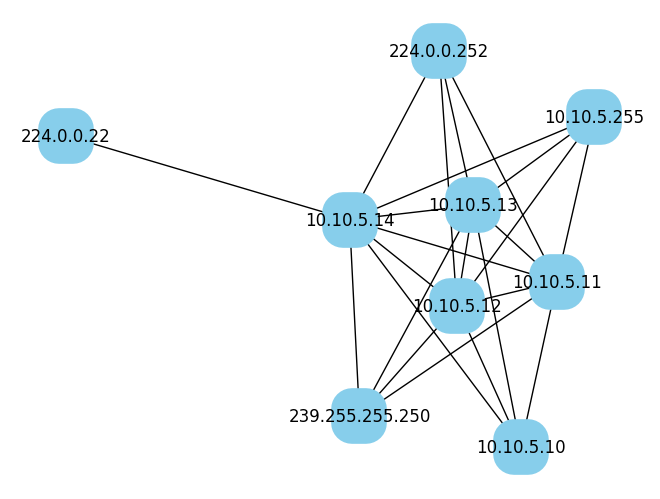

In [7]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



print('Conclusion----->: 224.0.0.22 has longest distance apart from others.')

df1 = df[['Source','Destination','Protocol','Length','Info','Minutes']]

# # Build your graph
G = nx.Graph()
G=nx.from_pandas_edgelist(df1,'Source','Destination')
 


 
# Graph with Custom nodes:
nx.draw(G, with_labels=True, node_size=100, node_color="skyblue", node_shape="s", alpha=1, linewidths=30)
plt.show()


### (Advanced) Task 7: For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False (3)

*Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.*



In [8]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import pandas as pd
import networkx as nx
import seaborn as sns
import numpy as np




print('Conclusion----->: It showed true condition on the unique protocol false on other protocol')

protocols = df1['Protocol'].unique()


for i in protocols:
    df1[i] = df['Protocol'] == i

df1

Conclusion----->: It showed true condition on the unique protocol false on other protocol


/tmp/ipykernel_5204/182874477.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = df['Protocol'] == i
/tmp/ipykernel_5204/182874477.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = df['Protocol'] == i


,Source,Destination,Protocol,Length,Info,Minutes,TCP,NBNS,LLMNR,SSDP,HTTP,HTTP/XML,BROWSER,SMB,SMB Pipe,NBSS,IGMPv3,SMB2,LANMAN
0,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0,0,True,False,False,False,False,False,False,False,False,False,False,False,False
2,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5...",0,True,False,False,False,False,False,False,False,False,False,False,False,False
3,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...,0,True,False,False,False,False,False,False,False,False,False,False,False,False
4,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34455,10.10.5.13,10.10.5.10,TCP,8214,"49196 > 1293 [PSH, ACK] Seq=298831 Ack=811 W...",13,True,False,False,False,False,False,False,False,False,False,False,False,False
34456,10.10.5.10,10.10.5.13,TCP,54,1293 > 49196 [ACK] Seq=811 Ack=306991 Win=43...,13,True,False,False,False,False,False,False,False,False,False,False,False,False
34457,10.10.5.10,10.10.5.13,TCP,69,"1293 > 49196 [PSH, ACK] Seq=811 Ack=306991 W...",13,True,False,False,False,False,False,False,False,False,False,False,False,False
34460,10.10.5.13,10.10.5.10,TCP,60,49196 > 1293 [ACK] Seq=306991 Ack=826 Win=25...,13,True,False,False,False,False,False,False,False,False,False,False,False,False


### (Advanced) Task 8: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

*Hint: Think about how you did this in Task 1 and Task 2, and recall that plt.plot can be used to append to a plot.*

Conclusion----->: SMB has the most high value of total length over other protocols becasue it was most frequent used protocl from the WireShark traffic, and the user was constantly using SMB share such as transfer, writing files


Text(0, 0.5, 'Total packet Length')

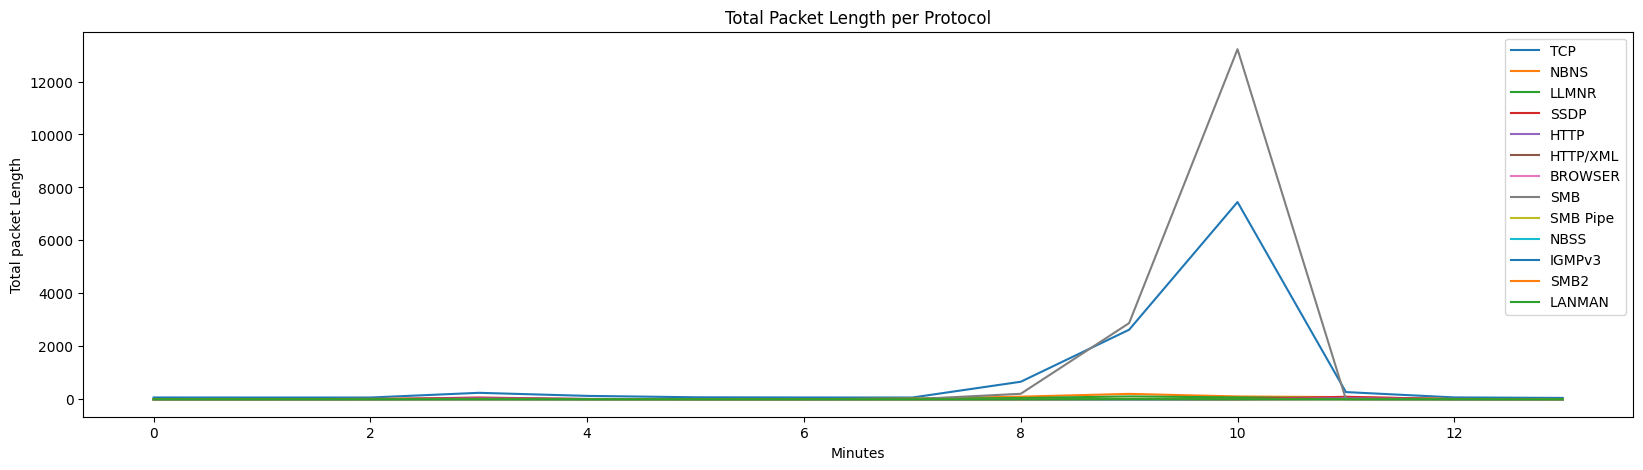

In [9]:
import matplotlib as mpl
import numpy as np
from pandas import DataFrame
import pandas as pd
import itertools
from numpy import array



print('Conclusion----->: SMB has the most high value of total length over other protocols becasue it was most frequent used protocl from the WireShark traffic, and the user was constantly using SMB share such as transfer, writing files')

new_data = df1.groupby(by=['Minutes'],sort=False).sum()





protocols = df1["Protocol"].unique()



fig, ax = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(20)

for i in protocols:
    ax.plot(new_data[i],label=i)
    ax.legend()

    
plt.title("Total Packet Length per Protocol")
plt.xlabel('Minutes')
plt.ylabel('Total packet Length')
